# Отчет

В качестве датасета был выбран tic-tac-toe (крестики-нолики). В датасете есть 9 фичей, на каждую клетку игрового поля. Каждая фича принимает значения "x", "o" - крестик/нолик в поле, либо "b" - отсутствие крестика и нолика. Таргет - победили ли крестики.

В датасете 958 примеров игр: положительных - 626, отрицательных - 332.

В качестве метрик используем Accuracy, Precision, Recall и несколько других, основная - Accuracy.

Для оценки качества разбиваем датасет на 10 фолдов, учимся на всех кроме одного, на нем тестируемся. Итоговое качество метода - усреднение по 10 разбиениям.

В качестве референсных значений посмотрим на стандартные модели sklearn

# Модели sklearn

## Logistric Regression
- True Positive: 60.5
- True Negative: 33.1
- False Positive: 1.4
- False Negative: 0.0
- True Positive Rate: 1.0
- True Negative Rate: 0.9602958928326576
- False Positive Rate: 0.02358527056702625
- Negative Predictive Value: 1.0
- False Discovery Rate: 0.022635416896346433
- ***Accuracy: 0.9852631578947368***
- Precision: 0.9773645831036536
- Recall: 1.0

## Decision Tree
- True Positive: 57.8
- True Negative: 31.8
- False Positive: 2.7
- False Negative: 2.7
- True Positive Rate: 0.956149981694667
- True Negative Rate: 0.9220655202640498
- False Positive Rate: 0.04506972975904758
- Negative Predictive Value: 0.9228632936814176
- False Discovery Rate: 0.04428678948826322
- ***Accuracy: 0.9431578947368422***
- Precision: 0.9557132105117369
- Recall: 0.956149981694667

## RandomForest
- True Positive: 59.3
- True Negative: 32.7
- False Positive: 1.8
- False Negative: 1.2
- True Positive Rate: 0.9799315131956592
- True Negative Rate: 0.9484169874243404
- False Positive Rate: 0.030206299811006317
- Negative Predictive Value: 0.9664421975083741
- False Discovery Rate: 0.029307159064101317
- ***Accuracy: 0.968421052631579***
- Precision: 0.9706928409358987
- Recall: 0.9799315131956592


Лучший результат - ***Accuracy: 0.985*** для логистической регрессии.

## Фичи на основе имликаций

Для кажого тестового примера будем считать меру похожести его на положительные и на отрицательные примеры, на что больше похож - тот и класс.



### Считаем сколько вообще встречаются фичи тестового примера в положительных и отрицательных выборках, нормируем эти значения и сравниваем

- True Positive: 38.4000
- True Negative: 23.8000
- False Positive: 10.7000
- False Negative: 22.1000
- True Positive Rate: 0.6350
- True Negative Rate: 0.6896
- False Positive Rate: 0.1777
- Negative Predictive Value: 0.5183
- False Discovery Rate: 0.2176
- ***Accuracy: 0.6547***
- Precision: 0.7824
- Recall: 0.6350

### Считаем относительно сколько объектов из положительной и отрицательной выборок близки к данному тестовому. Близость определяется так - объекты близки, если их признаки пересекаются по $>k\%$

Лучший результат при $k=70$
- True Positive: 58.5000
- True Negative: 34.5000
- False Positive: 0.0000
- False Negative: 2.0000
- True Positive Rate: 0.9673
- True Negative Rate: 1.0000
- False Positive Rate: 0.0000
- Negative Predictive Value: 0.9455
- False Discovery Rate: 0.0000
- ***Accuracy: 0.9789***
- Precision: 1.0000
- Recall: 0.9673

График зависимости Accuracy(k)
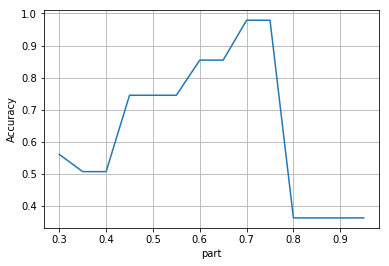

## Фичи на основе генераторов

### Мощность пересечения фичей

Будем считать для каждого тестового объекта и каждого объекта положительной и отрицательной выборок мощность пересечения фичей, то есть $|g' \cap g^{+}|$ и $|g' \cap g^{-}|$, после чего агрегировать(мин, макс, среднее, медиана, 90квантиль) эти значения по положительной/отрицательной выборкам и сравнивать, где больше - тот и класс (1 или 0)

Лучший результат при взятии среднего

- True Positive: 38.4000
- True Negative: 23.8000
- False Positive: 10.7000
- False Negative: 22.1000
- True Positive Rate: 0.6350
- True Negative Rate: 0.6896
- False Positive Rate: 0.1777
- Negative Predictive Value: 0.5183
- False Discovery Rate: 0.2176
- ***Accuracy: 0.6547***
- Precision: 0.7824
- Recall: 0.6350

### Поддержка supp
Считаем $supp_{+} = |(g' \cap g^{+})^{+}|$ и $supp_{-} = |(g' \cap g^{-})^{-}|$, агрегируем по своим выборкам и сравниваем

Лучший результат при взятии медианы
- True Positive: 57.7000
- True Negative: 34.5000
- False Positive: 0.0000
- False Negative: 2.8000
- True Positive Rate: 0.9533
- True Negative Rate: 1.0000
- False Positive Rate: 0.0000
- Negative Predictive Value: 0.9276
- False Discovery Rate: 0.0000
- ***Accuracy: 0.9705***
- Precision: 1.0000
- Recall: 0.9533

### Достоверности conf
Считаем $conf_{+} = |(g' \cap g^{+})^{-}|$ и $conf_{-} = |(g' \cap g^{-})^{+}|$, агрегируем по своим выборкам и сравниваем

Лучший результат при взятии max
- True Positive: 45.3000
- True Negative: 18.2000
- False Positive: 16.3000
- False Negative: 15.2000
- True Positive Rate: 0.7476
- True Negative Rate: 0.5242
- False Positive Rate: 0.2697
- Negative Predictive Value: 0.5481
- False Discovery Rate: 0.2662
- ***Accuracy: 0.6684***
- Precision: 0.7338
- Recall: 0.7476

### $Aggr(conf_{+}) > thr$
Агрегация и порог перебирались, лучший результат при агрегации медианой и пороге 0.05

- True Positive: 51.5000
- True Negative: 17.0000
- False Positive: 17.5000
- False Negative: 9.0000
- True Positive Rate: 0.8513
- True Negative Rate: 0.4940
- False Positive Rate: 0.2913
- Negative Predictive Value: 0.6629
- False Discovery Rate: 0.2526
- ***Accuracy: 0.7211***
- Precision: 0.7474
- Recall: 0.8513

### Другие
Классификаторы по $Aggr(supp_{+}) / (Aggr(supp_{-} + 1) > thr$ или $Aggr(conf_{+}) < thr \text{ && } Aggr(conf_{-}) > thr$ работают плохо

### Классификатор по правилу $Aggr(supp) > thr1 \text{ && } Aggr(conf) < thr2$ 
Лучший результат при 

- True  Positive: 0.5168
- True  Negative: 0.3137
- False Positive: 0.0000
- False Negative: 0.0000
- Contradictory: 0.1695
- ***Accuracy: 0.8305***

# Описанные выше фичи + sklearn
Будем делить обучающую выборку на 2 части, для каждого объекта из 2ой будем считать описанные выше признаки ($power_{+}, power_{-}, supp_{+}, supp_{-}, conf_{+}, conf_{-}$) со всеми функциями агрегации. На основе этих фичей для всех объектов из 2ой части учим Логистическую регрессию/Решающее дерево.

## Логистическая регрессия
- True Positive: 58.8
- True Negative: 31.8
- False Positive: 2.7
- False Negative: 1.7
- True Positive Rate: 0.9723475524123331
- True Negative Rate: 0.9199804607157548
- False Positive Rate: 0.044158663329736836
- Negative Predictive Value: 0.9480790112241726
- False Discovery Rate: 0.04273629820000788
- ***Accuracy: 0.9536842105263158***
- Precision: 0.9572637017999922
- Recall: 0.9723475524123331

## Решающее дерево
- True Positive: 57.2
- True Negative: 31.7
- False Positive: 2.8
- False Negative: 3.3
- True Positive Rate: 0.9449245962334276
- True Negative Rate: 0.919738521282639
- False Positive Rate: 0.046895965982428164
- Negative Predictive Value: 0.9093225821919899
- False Discovery Rate: 0.04627841942424787
- ***Accuracy: 0.9357894736842104***
- Precision: 0.9537215805757523
- Recall: 0.9449245962334276

# Итоги
Accuracy
***
- ***sklearn: 0.985***
- ***Ближайшие: 0.9789***
- $power = \|g' \cap g^{+}\|$: 0.6547
- $supp$: 0.9705
- $conf$: 0.6684
- $conf+thr$: 0.7211
- $Aggr(supp) > thr1 \text{ && } Aggr(conf) < thr2$: 0.8305
- sklearn+generator\_features(power, supp, conf): 0.954
***